In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Fuzzy Matching of data

## A common scenario for data scientists is the marketing, operations or business groups give you two sets of similar data with different variables & asks the analytics team to normalize both data sets to have  a common record for modelling.

 

### Here is an example of two similar data sets:


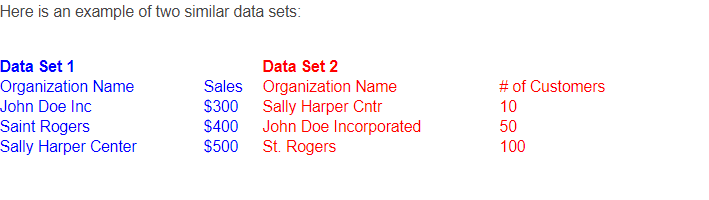



### How would you as a data scientist match these two different but similar data sets to have a master record for modelling?

### Consider that the Sales Data has 10 million records and the # of Customer data has 50,000 records

### Possible combinations are 500 Billions

## So an algorithm that tries to match all combinations of the data sets is probably NOT a good way to go


## Let's see some simple example of how to do something similar in a better way

### Make sure you installed the necessary Python libraries

### In *command window* 
* **type pip install fuzzywuzzy**
* **type pip install python-Levenshtein**

In [3]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

print('Running the method ratio()')
fuzz.ratio("ACME Factory", "ACME Factory Inc.")

Running the method ratio()


83

### We can see how the ratio() function is confused by the suffix “Inc.” used in company names, but really the two strings refer to the same entity. 

### This is captured by the partial ratio.

In [4]:
print('Running the method partial_ratio()')
fuzz.partial_ratio("ACME Factory", "ACME Factory Inc.")

Running the method partial_ratio()


100

### More examples

In [24]:
print('Running token_sort_ratio method')
fuzz.token_sort_ratio('Barack Obama', 'Barack H. Obama')

Running token_sort_ratio method


92

In [25]:
print('Running token_set_ratio method')
fuzz.token_set_ratio('Barack Obama', 'Barack H. Obama')

Running token_set_ratio method


100

### In case we have a list of options and we want to find the closest match(es), we can use the process module:

In [7]:
query = 'Barack Obama'
choices = ['Barack H Obama', 'Barack H. Obama', 'B. Obama']
# Get a list of matches ordered by score, default limit to 5
process.extract(query, choices)
# [('Barack H Obama', 95), ('Barack H. Obama', 95), ('B. Obama', 85)]
 
# If we want only the top one
process.extractOne(query, choices)
# ('Barack H Obama', 95)

[('Barack H Obama', 95), ('Barack H. Obama', 95), ('B. Obama', 86)]

('Barack H Obama', 95)

## So what are these different method doing and why are they producing somewhat different results

### Simple ratio
**The ratio method compares the whole string and follows the standard Levenshtein distance similarity ratio between two strings**

### Partial ratio
**The partial ratio method works on “optimal partial” logic. If the short string k and long string m are considered, the algorithm will score by matching the length of the k string**

### Token sort ratio
**The token sort ratio method sorts the tokens alphabetically. Then, the simple ratio method is applied to output the matched percentage**

### Token set ratio
**The token set ratio ignores the duplicate words. It is similar to the sort ratio method but more flexible. It basically extracts the common tokens and then applies fuzz.ratio() for comparisons**

## Other more sophisticated methods of finding text distance

## Levenshtein distance
Levenshtein distance measures the minimum number of insertions, deletions, and substitutions required to change one string into another. This can be a useful measure to use if you think that the differences between two strings are equally likely to occur at any point in the strings. It’s also more useful if you do not suspect full words in the strings are rearranged from each other (see Jaccard similarity further down)

### pip install textdistance[extras]

In [10]:
import textdistance

## Levenshtein distance
Levenshtein distance measures the minimum number of insertions, deletions, and substitutions required to change one string into another. This can be a useful measure to use if you think that the differences between two strings are equally likely to occur at any point in the strings. It’s also more useful if you do not suspect full words in the strings are rearranged from each other (see Jaccard similarity further down).

In [23]:
textdistance.levenshtein("this is my test", "that test of mine")
textdistance.levenshtein("test this of mine", "this test of mine")

11

6

## An implementation of Leveenshtein Distance and a test example

In [26]:
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [27]:
Str1 = "This is my test"
Str2 = "That test of mine"
Distance = levenshtein_ratio_and_distance(Str1,Str2)
print(Distance)
Ratio = levenshtein_ratio_and_distance(Str1,Str2,ratio_calc = True)
print(Ratio)

Str1 = "This is my test"
Str2 = "That test of mine"


The strings are 11 edits away
0.4375


## Jaro-Winkler
Jaro-Winkler is another similarity measure between two strings. This algorithm penalizes differences in strings more earlier in the string. A motivational idea behind using this algorithm is that typos are generally more likely to occur later in the string, rather than at the beginning. When comparing “this test” vs. “test this”, even though the strings contain the exact same words (just in different order), the similarity score is just 2/3. 

If it matters more that the beginning of two strings in your case are the same, then this could be a useful algorithm to try.

Saying the same in a slightly different way still finds the similarity

In [14]:
textdistance.jaro_winkler("this is my test", "test this test of mine")
textdistance.jaro_winkler("this is my test", "this test of mine")

0.6909867909867909

0.8511764705882353

## Jaccard Similarity
Jaccard similarity measures the shared characters between two strings, regardless of order. In the first example below, we see the first string, “this test”, has nine characters (including the space). The second string, “that test”, has an additional two characters that the first string does not (the “at” in “that”). This measure takes the number of shared characters (seven) divided by this total number of characters (9 + 2 = 11). Thus, 7 / 11 = .636363636363…

In [15]:
textdistance.jaccard("this is my test", "that is my test")
 
textdistance.jaccard("this is my test", "mine this test of mine")

textdistance.jaccard("this is my test", "my test is this")

0.7647058823529411

0.5416666666666666

1.0

## Some real life applications of fuzzy matching

https://towardsdatascience.com/natural-language-processing-for-fuzzy-string-matching-with-python-6632b7824c49

https://www.youtube.com/watch?v=kTS2b6pGElE&t=940s

https://www.youtube.com/watch?v=s0YSKiFdj8Q&t=15s



In [22]:
#Class example
fuzz.token_set_ratio('The quick brown fox', 'jumped over the lazy dogs')
fuzz.token_sort_ratio('The quick brown fox', 'jumped over the lazy dogs')

fuzz.token_set_ratio('This is my test', 'This test is mine')
fuzz.token_sort_ratio('This is my test', 'This test is mine')

32

32

89

88